In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igc_tools
import math_utils
%load_ext autoreload
%autoreload 2

# ICG Review Tools

#### IGC Loading

In [5]:
IGC_file = "potato.IGC"
flight_log = igc_tools.IGCLog(IGC_file)

/Users/rbarlow/Documents/igc_review/igc_tools.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe["glide"][self.dataframe["vertical_speed_gnss_average_ms"] > -0.4] = np.nan


#### KML Export

In [6]:
flight_log.export_tracks("potato")

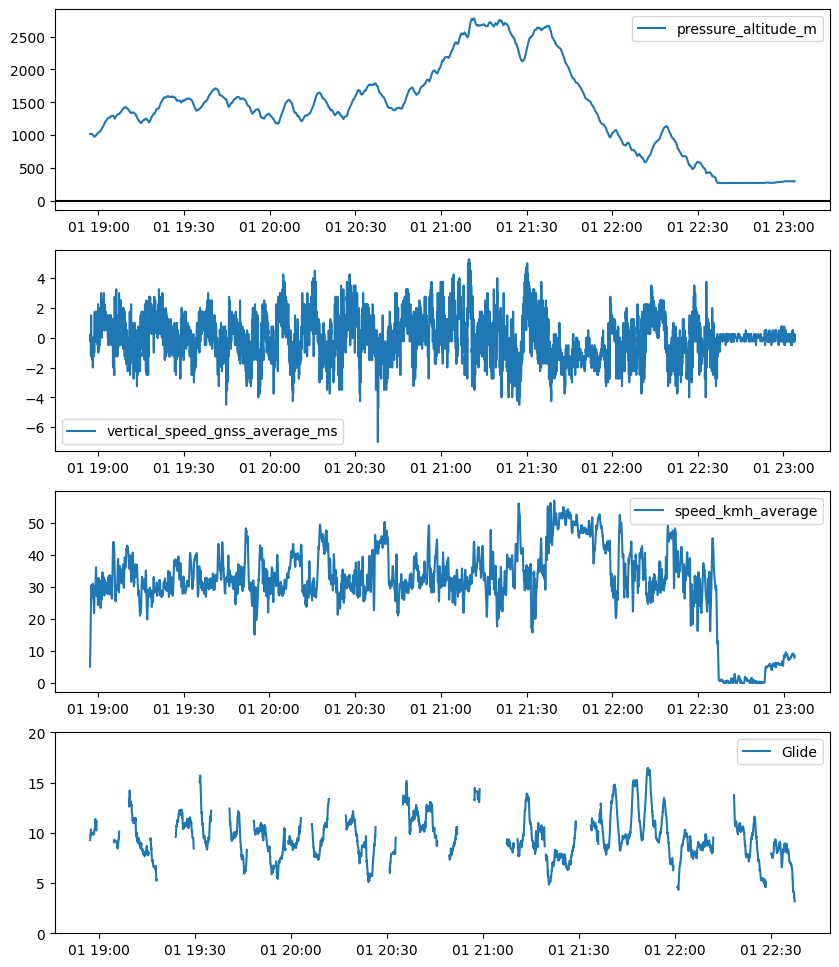

In [3]:
fig, axes = plt.subplots(4,1, figsize = [10, 12])
ax1, ax2, ax3, ax4 = axes
ax1.plot(flight_log.dataframe["time_pandas"],
           flight_log.dataframe["pressure_altitude_m"],
           label = "pressure_altitude_m")
ax1.axhline(color = "black")

ax2.plot(flight_log.dataframe["time_pandas"], 
         flight_log.dataframe["vertical_speed_gnss_average_ms"],
         label = "vertical_speed_gnss_average_ms")

ax3.plot(flight_log.dataframe["time_pandas"], 
         flight_log.dataframe["speed_kmh_average"],
         label = "speed_kmh_average")

ax4.plot(flight_log.dataframe["time_pandas"], 
         flight_log.dataframe["glide_60s"], label = "Glide")

ax4.set_ylim([0, 20])

for ax in axes:
    ax.legend()